In [2]:
import matplotlib.pyplot as plt
import numpy as np

### Codec Performance

Saving Evaluation Performance Multiscale Plot


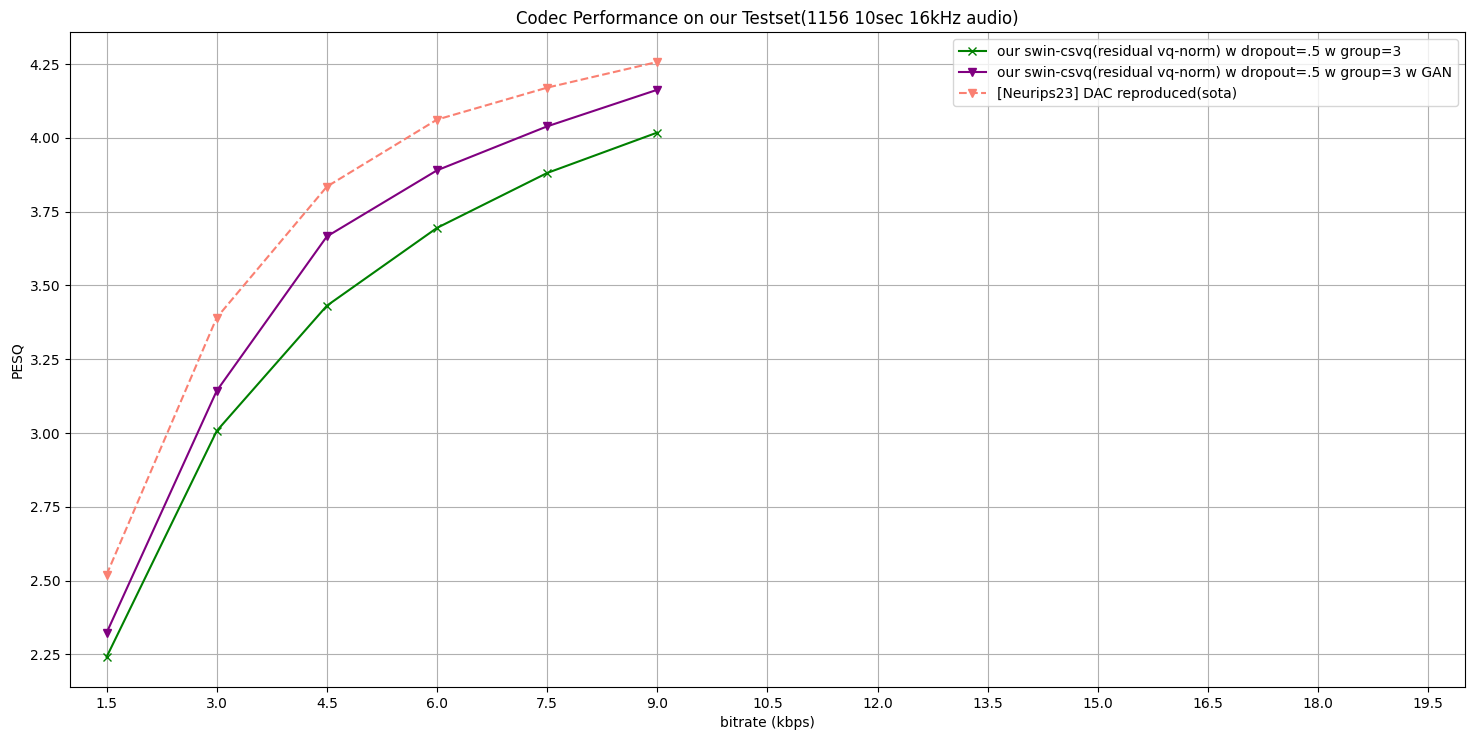

In [5]:
print("Saving Evaluation Performance Multiscale Plot")
csvq_residual = np.array([2.4, 2.7, 2.93, 3.2, 3.3, 3.32])
csvq_merge = np.array([2.5, 3.2, 3.6, 3.85, 4.0, 4.1])
csvq_merge_gan = np.array([2.81, 3.59, 3.83, 4.03, 4.1, 4.25])


swin_csvq_residual_ema = np.array([2.679, 3.426, 3.773, 3.970, 4.070, 4.133]) # with no vq normalization, but trained by ema
swin_csvq_residual_baseline = np.array([2.922, 3.579, 3.869, 4.101, 4.189, 4.194]) # with vq normalization
swin_csvq_residual_baseline_effective_bps = np.array([2.447, 5.024, 6.983, 9.765, 12.521, 14.034])
swin_csvq_residual_vq_control = np.array([2.278, 2.694, 2.957, 3.260, 3.492, 3.666]) # with no vq normalization
swin_csvq_residual_dropout_control = np.array([2.702, 3.498, 3.804, 4.057, 4.209, 4.290])

swin_csvq_residual_9k = np.array([2.241, 3.007, 3.4313, 3.695, 3.881, 4.018])
swin_csvq_residual_9k_gan = np.array([2.323, 3.143, 3.666, 3.890, 4.039, 4.163])

plt.figure(figsize=(18,8.5))
plt.title("Codec Performance on our Testset(1156 10sec 16kHz audio)")
plt.xlim((1,20))
plt.xticks(np.arange(1.5,21,1.5))

# Ours
# plt.plot(np.array([b*3.0 for b in range(1, 7)]), np.array(swin_csvq_residual_ema), marker='x', color='green', label="our swin-csvq(residual ema)")
# plt.plot(np.array([b*3.0 for b in range(1, 7)]), np.array(swin_csvq_residual_baseline), marker='x', color='blue', label="our swin-csvq(residual vq-norm)")
# plt.plot(np.array([b*3.0 for b in range(1, 7)]), swin_csvq_residual_dropout_control, marker='o', color='tab:blue', label="our swin-csvq(residual vq-norm) w dropout=.5")
# plt.plot(np.array([b*3.0 for b in range(1, 7)]), np.array(swin_csvq_residual_vq_control), marker='x', color='purple', label="our swin-csvq(residual no ema)")
# plt.plot(swin_csvq_residual_baseline_effective_bps, swin_csvq_residual_baseline, marker='x', color='purple', label="our swin-csvq(residual vq-norm) effective")
plt.plot(np.array([b*1.5 for b in range(1, 7)]), swin_csvq_residual_9k, marker='x', color='green', label="our swin-csvq(residual vq-norm) w dropout=.5 w group=3")
plt.plot(np.array([b*1.5 for b in range(1, 7)]), swin_csvq_residual_9k_gan, marker='v', color='purple', label="our swin-csvq(residual vq-norm) w dropout=.5 w group=3 w GAN")

# CSVQ Source Paper
# plt.plot(np.array([b*3.0 for b in range(1, 7)]), csvq_residual, linestyle='--', marker='v', color='blue', label="[Jiang, 2022] csvq(residual)")
# plt.plot(np.array([b*3.0 for b in range(1, 7)]), csvq_merge, linestyle='--', marker='v', color='c', label="[Jiang, 2022] csvq(merge)")
# plt.plot(np.array([b*3.0 for b in range(1, 7)]), csvq_merge_gan, linestyle='--', marker='v', color='tab:blue', label="[Jiang, 2022] csvq(merge)+GAN")

# DAC (sota)
dac_released = np.array([1.259, 1.942, 3.143, 4.014])
dac_reproduced = np.array([2.519, 3.447, 3.820, 4.065])
dac_bps = np.array([1.5, 3, 4.5, 6])

dac_9k_reproduced = [2.5201, 3.3909, 3.8348, 4.0619, 4.1702, 4.2572]

# plt.plot(dac_bps, dac_reproduced, linestyle='--', marker='v', color='salmon', label="[Neurips23] DAC reproduced(sota)")
plt.plot(np.array([b*1.5 for b in range(1, 7)]), dac_9k_reproduced, linestyle='--', marker='v', color='salmon', label="[Neurips23] DAC reproduced(sota)")
# plt.plot(dac_bps, dac_released, linestyle='--', marker='*', color='red', label="[Neurips23] DAC released(sota)")

plt.xlabel("bitrate (kbps)")
plt.ylabel("PESQ")
plt.grid()
plt.legend()
# plt.savefig(f"../assets/test_result_curve.jpg", dpi=200, bbox_inches='tight', pad_inches=.5)

plt.show()

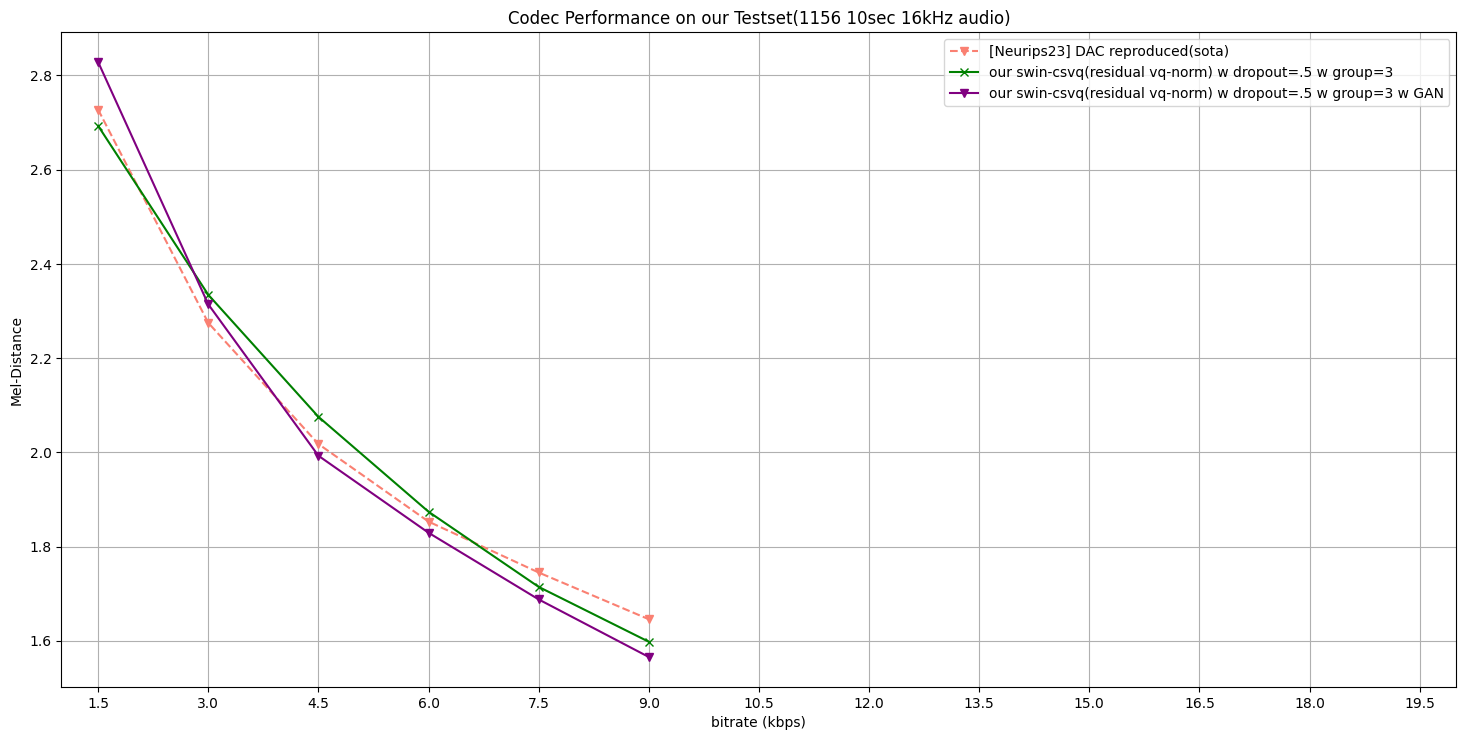

In [7]:
dac_reproduced = [2.6886, 2.2183, 1.9954, 1.8237] # 400k-iter
dac_9k_reproduced = [2.7276, 2.2751, 2.0179, 1.8532, 1.7451, 1.6459] # 9k version
dac_released = [4.5164, 3.6125, 2.9748, 2.3306]

swin_csvq_residual_9k = [2.6932, 2.3347, 2.0757, 1.8741, 1.7146, 1.5981]    # 400k-iter
swin_csvq_residual_9k_gan = [2.8287, 2.3144, 1.9930, 1.8295, 1.6880, 1.5658]

swin_csvq_residual_18k = [2.4822, 2.1089, 1.8974, 1.7241, 1.5673, 1.4772]

dac_bps = np.array([1.5, 3, 4.5, 6])
our9k_bps = np.arange(1.5,9.1,1.5)
out18k_bps = np.arange(3,18.1,3)

plt.figure(figsize=(18,8.5))
plt.title("Codec Performance on our Testset(1156 10sec 16kHz audio)")
plt.xlim((1,20))
plt.xticks(np.arange(1.5,21,1.5))

# plt.plot(dac_bps, dac_reproduced, linestyle='--', marker='v', color='salmon', label="[Neurips23] DAC reproduced(sota)")
# plt.plot(dac_bps, dac_released, linestyle='--', marker='*', color='red', label="[Neurips23] DAC released(sota)")
plt.plot(our9k_bps, dac_9k_reproduced, linestyle='--', marker='v', color='salmon', label="[Neurips23] DAC reproduced(sota)")
plt.plot(our9k_bps, swin_csvq_residual_9k, marker='x', color='green', label="our swin-csvq(residual vq-norm) w dropout=.5 w group=3")
plt.plot(our9k_bps, swin_csvq_residual_9k_gan, marker='v', color='purple', label="our swin-csvq(residual vq-norm) w dropout=.5 w group=3 w GAN")
# plt.plot(out18k_bps, swin_csvq_residual_18k, marker='o', color='tab:blue', label="our swin-csvq(residual vq-norm) w dropout=.5")

plt.xlabel("bitrate (kbps)")
plt.ylabel("Mel-Distance")
plt.grid()
plt.legend()
# plt.savefig(f"../assets/test_result_curve.jpg", dpi=200, bbox_inches='tight', pad_inches=.5)

plt.show()

### Codec VQ Evaluation

In [ ]:
from run_vq_stats import visualize
import json

# Trainset

eval_model = "swin-18k-residual"
split = "train"

entropy_stats = json.load(open(f"../assets/results/{eval_model}/vq_stats/{split}/entropy.json", "r"))
usage_stats = json.load(open(f"../assets/results/{eval_model}/vq_stats/{split}/usage.json", "r"))

visualize(entropy_stats, usage_stats, title=f"VQ STATS: {eval_model} on {split} set")

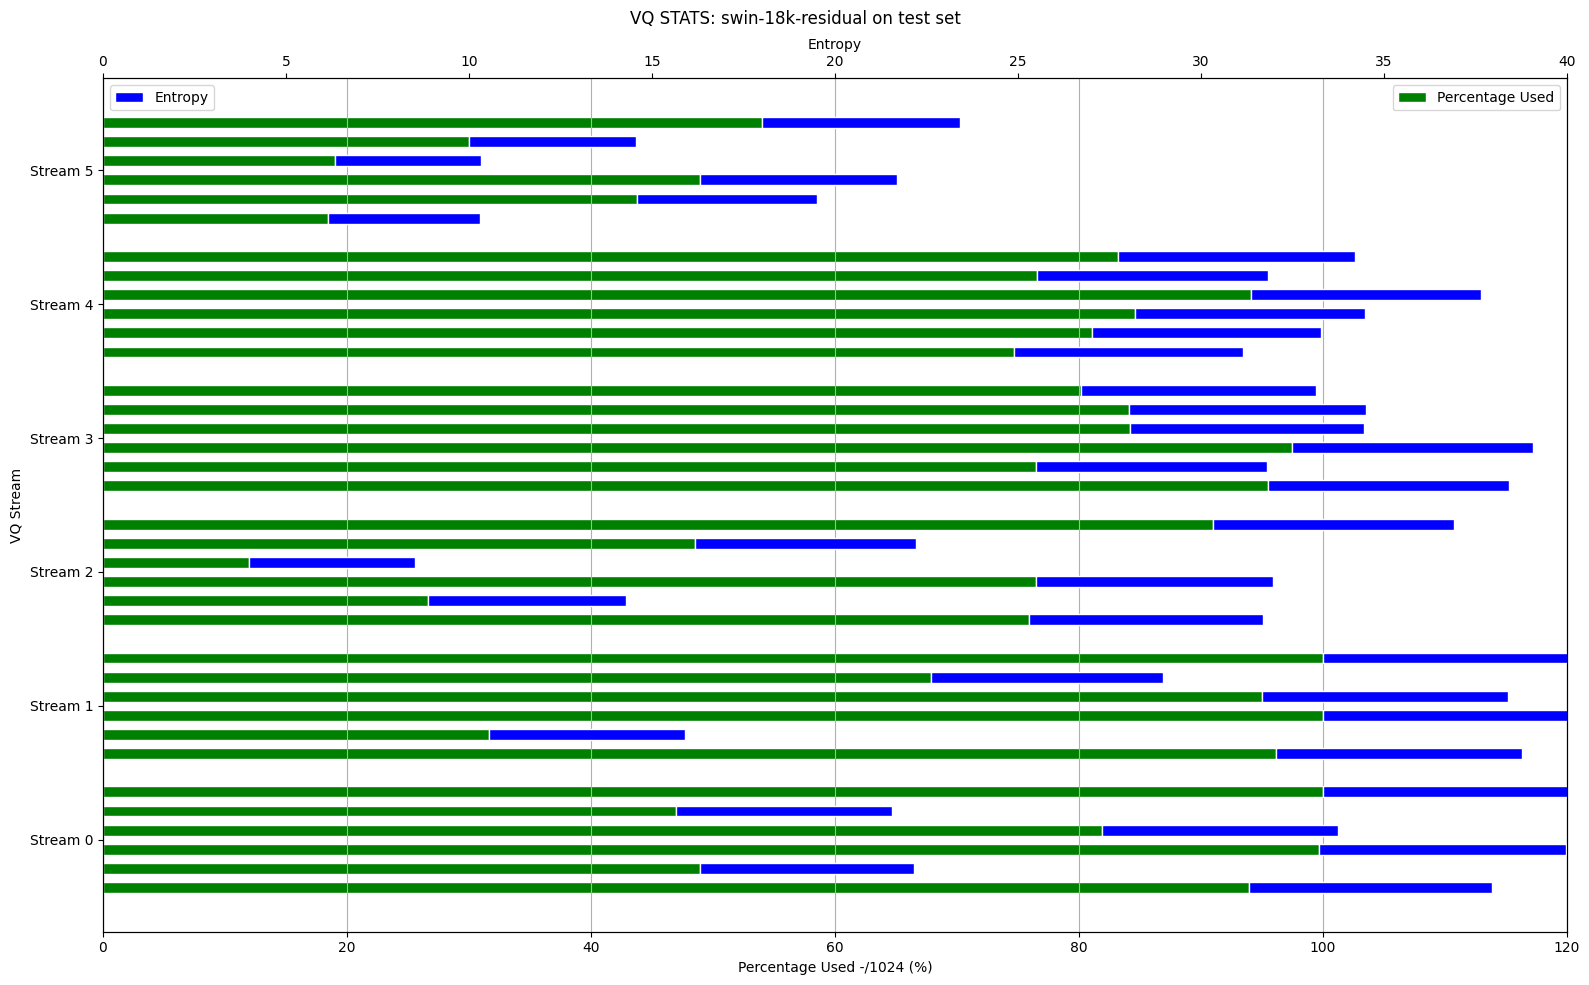

In [10]:
# Testset
eval_model = "swin-18k-residual"
split = "test"

entropy_stats = json.load(open(f"../assets/results/{eval_model}/vq_stats/{split}/entropy.json", "r"))
usage_stats = json.load(open(f"../assets/results/{eval_model}/vq_stats/{split}/usage.json", "r"))

visualize(entropy_stats, usage_stats, title=f"VQ STATS: {eval_model} on {split} set")

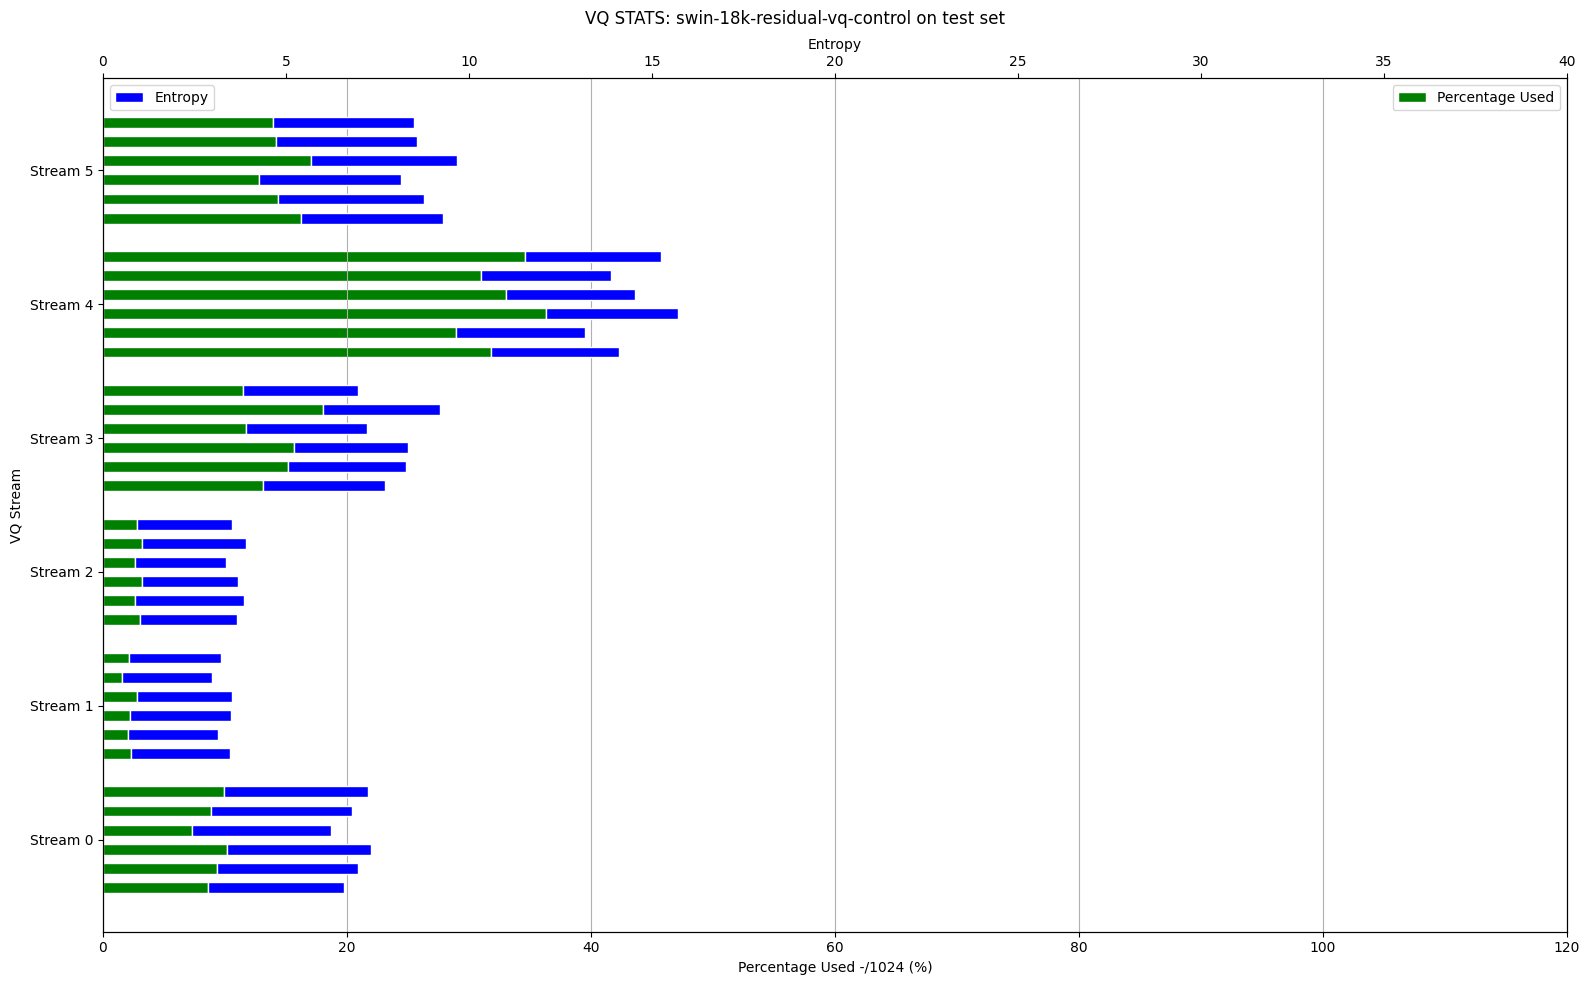

In [11]:
eval_model = "swin-18k-residual-vq-control"
split = "test"

entropy_stats = json.load(open(f"../assets/results/{eval_model}/vq_stats/{split}/entropy.json", "r"))
usage_stats = json.load(open(f"../assets/results/{eval_model}/vq_stats/{split}/usage.json", "r"))

visualize(entropy_stats, usage_stats, title=f"VQ STATS: {eval_model} on {split} set")

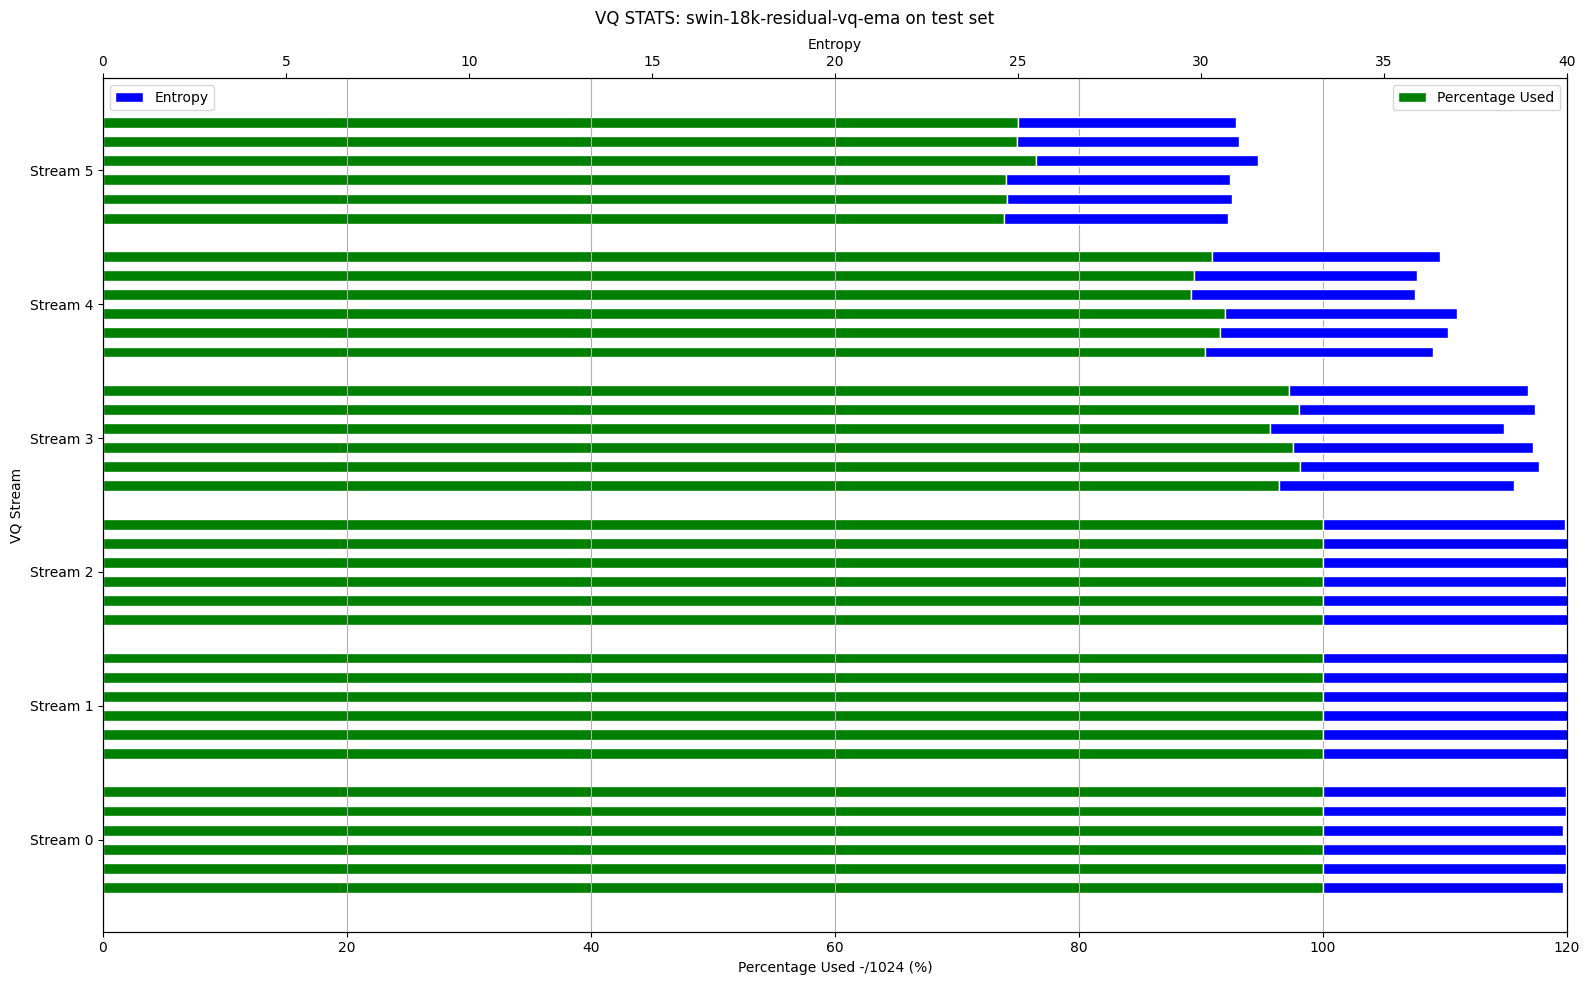

In [12]:
eval_model = "swin-18k-residual-vq-ema"
split = "test"

entropy_stats = json.load(open(f"../assets/results/{eval_model}/vq_stats/{split}/entropy.json", "r"))
usage_stats = json.load(open(f"../assets/results/{eval_model}/vq_stats/{split}/usage.json", "r"))

visualize(entropy_stats, usage_stats, title=f"VQ STATS: {eval_model} on {split} set")

In [28]:
import torch, torchaudio

sr = 24000
x = torch.randn(1, 10*sr-80)

In [29]:
trans = torchaudio.transforms.Spectrogram(
    win_length=20*sr//1000,
    hop_length=5*sr//1000,
    n_fft=(256-1)*2,
    power=None,
)

In [47]:
import torchaudio
x, _ = torchaudio.load("/Users/tracy/Desktop/Audio_Codec/swin-debug-vis/test/english_instance1.wav")

In [48]:
x.min(), x.max()

(tensor(-0.3415), tensor(0.3395))

In [75]:
z = torch.ones(4, 20, 8)
n_quantizers=12
mask = (
                torch.full((z.shape[0],), fill_value=0, device=z.device) < n_quantizers
            )

In [79]:
mask[:, None, None]

tensor([[[True]],

        [[True]],

        [[True]],

        [[True]]])

In [80]:
import torch

dist_uniform = torch.ones(1024) / 1024
dist_uniform

tensor([0.0010, 0.0010, 0.0010,  ..., 0.0010, 0.0010, 0.0010])

In [83]:
sum(dist_uniform * dist_uniform.log2())

tensor(-10.)